# ANÁLISIS DESCRIPTIVO

In [3]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sales_path = os.path.join(current_dir, '../data/raw/Dataframe_Final_Data.csv')

sales = pd.read_csv(sales_path)

sales.head()

C:\Users\andta\AppData\Local\Temp\ipykernel_21432\25334870.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv(sales_path)


,CategoryID,CategoryName,ProductName,Price,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,SalesID,CustomerID,Quantity,ProductID,Discount,TotalPrice,Date_x,TransactionNumber,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID,CountryName,CountryCode,State,pib,rpc,wti,Unemployment Rate,Population_2018,personal_income,Crecimiento (%)
0,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,19077,98726,25,15,0.1,0.0,NaN,DNPDCTGZSONAGKEWLEQ7,Thomas,R,Rangel,6,72 West White First Way,Austin,781,32,United States,AR,Texas,NaN,NaN,NaN,NaN,28628666.0,5.762952e+06,1.18
1,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,125395,77870,20,15,0.0,0.0,NaN,RSG6YQO7W8ZG9MUWJTLC,Oscar,B,Young,36,38 First Way,Detroit,72819,32,United States,AR,Michigan,NaN,NaN,NaN,NaN,9984072.0,5.713350e+06,0.11
2,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,136141,91603,24,15,0.0,0.0,NaN,J5U5RBSY3GOYU7LBMGH9,Mary,G,Herrera,50,670 White Oak Way,Cincinnati,83634,32,United States,AR,Ohio,NaN,NaN,NaN,NaN,11676341.0,6.392306e+06,0.14
3,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,139321,6206,2,15,0.0,0.0,NaN,0DKN419DSBL9Y2BWSDPL,Ebony,P,Hancock,59,45 White New Parkway,Kansas,56647,32,United States,AR,Kansas,NaN,NaN,NaN,NaN,2911359.0,1.403880e+06,0.09
4,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,188395,19057,5,15,0.0,0.0,NaN,RPPCBUJ4ZXY5JJA4HKK3,Lynn,K,Bonilla,61,39 Nobel Boulevard,Miami,6794,32,United States,AR,Florida,NaN,NaN,NaN,NaN,21244317.0,1.608971e+07,1.34


- Renombramos las columnas para que sean más fácil de detectar

In [5]:
sales = sales.rename(columns = {"Date_x": "Date",
                                "Crecimiento (%)": "Crecimiento_poblacional",
                                'Unemployment Rate': 'Unemployment_Rate'
                                })

- Revisamos el origen de los datos nulos para ver si son coherentes con lo esperado

In [6]:
isna_sum = sales.isna().sum()

isna_sum.sort_values(ascending = False)

Crecimiento_poblacional    281533
Population_2018            281533
Date                        67526
pib                         67526
wti                         67526
Unemployment_Rate           67526
rpc                         67526
MiddleInitial               67167
ProductName                     0
CategoryID                      0
CategoryName                    0
CustomerID                      0
SalesID                         0
Price                           0
Class                           0
IsAllergic                      0
VitalityDays                    0
ModifyDate                      0
Resistant                       0
FirstName                       0
TransactionNumber               0
Discount                        0
TotalPrice                      0
ProductID                       0
Quantity                        0
LastName                        0
CityID                          0
CountryCode                     0
CountryName                     0
CountryID     

- Dropeamos las filas con NaN vinculadas a Date, ya que no vamos a poder entrenar nuestro modelo sin este dato

In [7]:
sales = sales.dropna(subset=['Date'])

sales.head()

,CategoryID,CategoryName,ProductName,Price,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,SalesID,CustomerID,Quantity,ProductID,Discount,TotalPrice,Date,TransactionNumber,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID,CountryName,CountryCode,State,pib,rpc,wti,Unemployment_Rate,Population_2018,personal_income,Crecimiento_poblacional
67526,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,12630,24490,7,15,0.0,0.0,2018-01-01,5BSK7H5X44DGRUWEKJEA,Jill,P,Soto,14,31 New Parkway,Indianapolis,81678,32,United States,AR,Indiana,1.225389e+14,1.534967e+10,63.659048,3.8,6695497.0,3.403557e+06,0.56
67527,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,115884,95026,25,15,0.0,0.0,2018-01-01,3Q0RRIMLEEIMZ4U2G347,Pamela,Z,Estrada,4,949 Milton Drive,Fremont,20641,32,United States,AR,California,9.364726e+14,1.991167e+10,63.659048,4.8,39461588.0,4.156992e+07,0.26
67528,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,217388,27676,8,15,0.0,0.0,2018-01-01,T2ZK8X0HU1KWKPRQ5MUQ,Anita,B,Sanchez,10,30 West Milton Way,Toledo,52048,32,United States,AR,Ohio,2.175128e+14,1.570400e+10,63.659048,5.2,11676341.0,6.392306e+06,0.14
67529,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,364759,11630,3,15,0.2,0.0,2018-01-01,ILPQKU2EBTVNMTN7FQNL,Dustin,B,Coffey,40,904 Oak Parkway,Cleveland,51352,32,United States,AR,Ohio,2.175128e+14,1.570400e+10,63.659048,5.2,11676341.0,6.392306e+06,0.14
67530,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,447481,83733,22,15,0.2,0.0,2018-01-01,TI5RNV3CZM39NW16FG9M,Bridgette,X,Valenzuela,44,52 Rocky Second Drive,Memphis,73999,32,United States,AR,Tennessee,1.203899e+14,1.524400e+10,63.659048,3.8,6771631.0,3.328174e+06,0.94


- Verificamos si se han eliminado los NaN vinculados a las filas de Date

In [8]:
isna_sum = sales.isna().sum()

isna_sum.sort_values(ascending = False)

Crecimiento_poblacional    278717
Population_2018            278717
MiddleInitial               66501
ProductName                     0
CategoryName                    0
CategoryID                      0
Price                           0
IsAllergic                      0
VitalityDays                    0
ModifyDate                      0
Class                           0
CustomerID                      0
Quantity                        0
Discount                        0
ProductID                       0
TotalPrice                      0
Date                            0
SalesID                         0
Resistant                       0
FirstName                       0
TransactionNumber               0
LastName                        0
CityID                          0
Zipcode                         0
CountryID                       0
Address                         0
CityName                        0
CountryCode                     0
CountryName                     0
State         

- Averiguamos los NaN del crecimiento poblacional y población del 2018

In [9]:
y = sales[sales['Population_2018'].isna()]

y['State'].value_counts()

State
Alabama    208431
Alaska      70286
Name: count, dtype: int64

Tal como y podemos ver, los datos de estos dos Estados no están presentes como vimos en la vista previa cuando se cargó en el DataFrame

- Ahora seleccionamos las columnas sobre las que queremos analizar (media, mediana, moda, desviación estándar, rango, percentiles, cuartiles y la distribución (para ver si hay asimetría o se trata de una distribución normal))

In [10]:
sales.columns

Index(['CategoryID', 'CategoryName', 'ProductName', 'Price', 'Class',
       'ModifyDate', 'Resistant', 'IsAllergic', 'VitalityDays', 'SalesID',
       'CustomerID', 'Quantity', 'ProductID', 'Discount', 'TotalPrice', 'Date',
       'TransactionNumber', 'FirstName', 'MiddleInitial', 'LastName', 'CityID',
       'Address', 'CityName', 'Zipcode', 'CountryID', 'CountryName',
       'CountryCode', 'State', 'pib', 'rpc', 'wti', 'Unemployment_Rate',
       'Population_2018', 'personal_income', 'Crecimiento_poblacional'],
      dtype='object')

- Vamos a analizar 100% las siguientes: `Price`,
`VitalityDays`,
`Quantity`,
`Discount`,
`TotalPrice`,
`pib`,
`rpc` (probablemente ingreso per cápita),
`wti` (precio del petróleo),
`Unemployment Rate`,
`Population_2018`,
`personal_income`,
`Crecimiento_poblacional`.

- En caso de querer profundizar más y haciendo los cambios pertinentes: Resistant → si es 0/1, podés analizar proporciones.
IsAllergic → igual que la anterior.
Class → si es un número o código, puede analizarse.
CategoryID, CustomerID, ProductID, SalesID, CityID, CountryID → pueden ser tratados como categóricos si se usan como variables dummy o frecuencia.

In [11]:
sales.describe()

,CategoryID,Price,VitalityDays,SalesID,CustomerID,Quantity,ProductID,Discount,TotalPrice,CityID,Zipcode,CountryID,pib,rpc,wti,Unemployment_Rate,Population_2018,personal_income,Crecimiento_poblacional
count,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6690599.0,6.690599e+06,6.690599e+06,6690599.0,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.411882e+06,6.690599e+06,6.411882e+06
mean,5.864255e+00,5.082559e+01,2.603362e+01,3.379160e+06,4.939504e+04,1.300385e+01,2.265522e+02,2.996458e-02,0.0,4.858283e+01,5.127954e+04,32.0,3.212437e+14,1.737205e+10,6.410850e+01,4.145125e+00,1.548362e+07,1.375012e+07,5.784895e-01
std,3.267914e+00,2.857334e+01,3.902472e+01,1.950887e+06,2.850614e+04,7.209986e+00,1.304742e+02,6.397781e-02,0.0,2.766061e+01,2.976435e+04,0.0,3.021912e+14,2.449325e+09,2.496324e+00,7.386943e-01,1.272304e+07,1.428531e+07,5.878197e-01
min,1.000000e+00,4.490000e-02,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,1.000000e+00,1.570000e+02,32.0,1.748017e+13,1.235700e+10,5.919000e+01,2.000000e+00,7.015470e+05,1.075997e+06,-4.400000e-01
25%,3.000000e+00,2.657760e+01,0.000000e+00,1.689668e+06,2.470300e+04,7.000000e+00,1.140000e+02,0.000000e+00,0.0,2.500000e+01,2.187400e+04,32.0,1.094769e+14,1.535733e+10,6.218368e+01,3.700000e+00,5.807406e+06,3.403557e+06,1.400000e-01
50%,6.000000e+00,5.263670e+01,0.000000e+00,3.379225e+06,4.941300e+04,1.300000e+01,2.270000e+02,0.000000e+00,0.0,4.900000e+01,5.135200e+04,32.0,1.843380e+14,1.678833e+10,6.365905e+01,4.200000e+00,9.984072e+06,5.762952e+06,3.000000e-01
75%,9.000000e+00,7.524860e+01,5.200000e+01,5.068618e+06,7.407700e+04,1.900000e+01,3.400000e+02,0.000000e+00,0.0,7.200000e+01,8.056300e+04,32.0,5.556896e+14,1.962367e+10,6.614000e+01,4.600000e+00,2.862867e+07,2.094627e+07,1.180000e+00
max,1.100000e+01,9.987550e+01,1.200000e+02,6.758125e+06,9.875900e+04,2.500000e+01,4.520000e+02,2.000000e-01,0.0,9.600000e+01,9.785900e+04,32.0,9.460646e+14,2.723833e+10,7.073000e+01,7.300000e+00,3.946159e+07,5.639572e+07,1.930000e+00


- Vemos que la columna de TotalPrice presenta 0 en sus datos, habría que calcularlo como: Price * Quantity  * (1 - Discount)

In [12]:
sales['TotalPrice'].value_counts()

TotalPrice
0.0    6690599
Name: count, dtype: int64

- Calculamos y creamos la nueva columna `Total_price` y eliminamos la anterior vacia

In [13]:
sales['Total_price'] = round((sales['Price'] * sales['Quantity'] * (1 - sales['Discount'])), 2)

sales.head()

,CategoryID,CategoryName,ProductName,Price,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,SalesID,CustomerID,Quantity,ProductID,Discount,TotalPrice,Date,TransactionNumber,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID,CountryName,CountryCode,State,pib,rpc,wti,Unemployment_Rate,Population_2018,personal_income,Crecimiento_poblacional,Total_price
67526,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,12630,24490,7,15,0.0,0.0,2018-01-01,5BSK7H5X44DGRUWEKJEA,Jill,P,Soto,14,31 New Parkway,Indianapolis,81678,32,United States,AR,Indiana,1.225389e+14,1.534967e+10,63.659048,3.8,6695497.0,3.403557e+06,0.56,227.09
67527,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,115884,95026,25,15,0.0,0.0,2018-01-01,3Q0RRIMLEEIMZ4U2G347,Pamela,Z,Estrada,4,949 Milton Drive,Fremont,20641,32,United States,AR,California,9.364726e+14,1.991167e+10,63.659048,4.8,39461588.0,4.156992e+07,0.26,811.05
67528,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,217388,27676,8,15,0.0,0.0,2018-01-01,T2ZK8X0HU1KWKPRQ5MUQ,Anita,B,Sanchez,10,30 West Milton Way,Toledo,52048,32,United States,AR,Ohio,2.175128e+14,1.570400e+10,63.659048,5.2,11676341.0,6.392306e+06,0.14,259.54
67529,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,364759,11630,3,15,0.2,0.0,2018-01-01,ILPQKU2EBTVNMTN7FQNL,Dustin,B,Coffey,40,904 Oak Parkway,Cleveland,51352,32,United States,AR,Ohio,2.175128e+14,1.570400e+10,63.659048,5.2,11676341.0,6.392306e+06,0.14,77.86
67530,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,447481,83733,22,15,0.2,0.0,2018-01-01,TI5RNV3CZM39NW16FG9M,Bridgette,X,Valenzuela,44,52 Rocky Second Drive,Memphis,73999,32,United States,AR,Tennessee,1.203899e+14,1.524400e+10,63.659048,3.8,6771631.0,3.328174e+06,0.94,570.98


In [14]:
sales = sales.drop(columns = ["TotalPrice"])
sales.columns

Index(['CategoryID', 'CategoryName', 'ProductName', 'Price', 'Class',
       'ModifyDate', 'Resistant', 'IsAllergic', 'VitalityDays', 'SalesID',
       'CustomerID', 'Quantity', 'ProductID', 'Discount', 'Date',
       'TransactionNumber', 'FirstName', 'MiddleInitial', 'LastName', 'CityID',
       'Address', 'CityName', 'Zipcode', 'CountryID', 'CountryName',
       'CountryCode', 'State', 'pib', 'rpc', 'wti', 'Unemployment_Rate',
       'Population_2018', 'personal_income', 'Crecimiento_poblacional',
       'Total_price'],
      dtype='object')

## Análisis descriptivo por columna:

- Vamos a analizar 100% las siguientes: `Price`,
`VitalityDays`,
`Quantity`,
`Discount`,
`Total_price`,
`pib`,
`rpc` (probablemente ingreso per cápita),
`wti` (precio del petróleo),
`Unemployment_Rate`,
`Population_2018`,
`personal_income`,
`Crecimiento_poblacional`.

In [15]:
pd.options.display.float_format = '{:.4f}'.format

### `Price`

In [16]:
print(sales.Price.describe())
print(f'Median: {sales.Price.median()}')
print(f'Mode: {sales.Price.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Price) - min(sales.Price)
print(f"Rango: {range_}")

count   6690599.0000
mean         50.8256
std          28.5733
min           0.0449
25%          26.5776
50%          52.6367
75%          75.2486
max          99.8755
Name: Price, dtype: float64
Median: 52.6367
Mode: 64.6118
Rango: 99.8306


- Valores nulos:

In [17]:
print(sales.Price.isnull().sum())

0


- Valores unicos:

In [18]:
print(sales.Price.nunique())

452


- Confirmación del tipo de datos de la columna:

In [19]:
sales.Price.dtype

dtype('float64')

- Distribución:

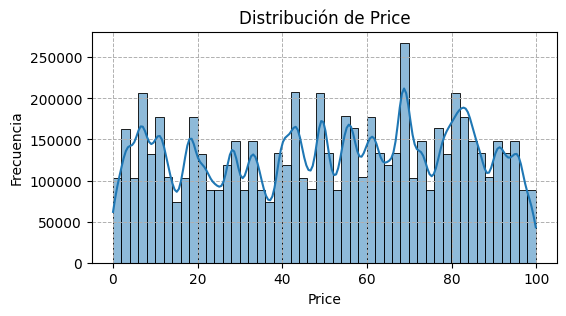

In [20]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Price'], kde=True, bins=50)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra que casi todos los productos cuestan entre 0 y 100, siendo 70 el precio más común. Hay pocos artículos caros (cerca de $100). Los precios son bastantes diferentes ya que como se observa hay todo tipos de precios.

- Weekly evolution of Price:

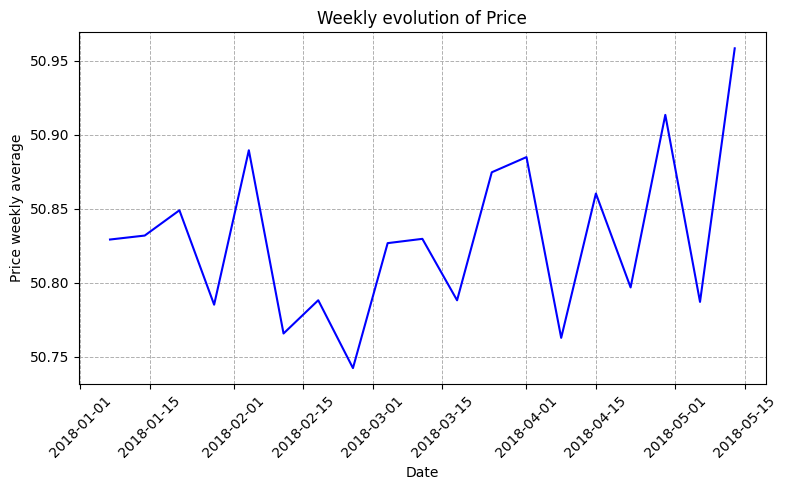

In [21]:
# Asegurar que la columna 'Date' es datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='Date')['Price'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['Date'], sales_semanal['Price'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of Price')
plt.xlabel('Date')
plt.ylabel('Price weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

Los precios subían y bajaban un poco cada semana, pero sin cambios bruscos. En febrero hubo un pequeño aumento, mientras que en marzo y abril se vio una leve baja. La línea azul del gráfico muestra que los precios se mantuvieron más o menos estables durante estos meses. Esto nos dice que no hubo grandes subidas ni bajadas repentinas.

### `VitalityDays`

In [22]:
print(sales.VitalityDays.describe())
print(f'Median: {sales.VitalityDays.median()}')
print(f'Mode: {sales.VitalityDays.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.VitalityDays) - min(sales.VitalityDays)
print(f"Rango: {range_}")

count   6690599.0000
mean         26.0336
std          39.0247
min           0.0000
25%           0.0000
50%           0.0000
75%          52.0000
max         120.0000
Name: VitalityDays, dtype: float64
Median: 0.0
Mode: 0.0
Rango: 120.0


- Valores nulos:

In [23]:
print(sales.VitalityDays.isnull().sum())

0


- Valores unicos:

In [24]:
print(sales.VitalityDays.nunique())

85


- Confirmación del tipo de datos de la columna:

In [25]:
sales.VitalityDays.dtype

dtype('float64')

- Distribución:

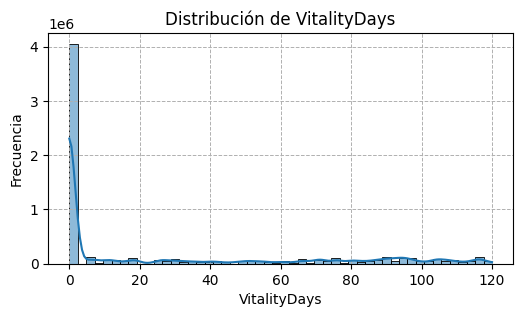

In [26]:
plt.figure(figsize=(6,3))
sns.histplot(sales['VitalityDays'], kde=True, bins=50)
plt.title('Distribución de VitalityDays')
plt.xlabel('VitalityDays')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

El gráfico muestra cómo se distribuyen los días de vitalidad en los datos analizados. La mayor concentración aparece en los primeros 100 días, donde hay más frecuencia de valores. A medida que aumentan los días, la cantidad de casos disminuye progresivamente. Se observa una curva que va bajando suavemente hacia la derecha. No hay picos extraños ni valores atípicos que llamen la atención.
Los datos parecen seguir un patrón lógico y coherente en su distribución.



### `Quantity`

In [27]:
print(sales.Quantity.describe())
print(f'Median: {sales.Quantity.median()}')
print(f'Mode: {sales.Quantity.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Quantity) - min(sales.Quantity)
print(f"Rango: {range_}")

count   6690599.0000
mean         13.0039
std           7.2100
min           1.0000
25%           7.0000
50%          13.0000
75%          19.0000
max          25.0000
Name: Quantity, dtype: float64
Median: 13.0
Mode: 18
Rango: 24


- Valores nulos:

In [28]:
print(sales.Quantity.isnull().sum())

0


- Valores unicos:

In [29]:
print(sales.Quantity.nunique())

25


- Confirmación del tipo de datos de la columna:

In [30]:
sales.Quantity.dtype

dtype('int64')

- Distribución:

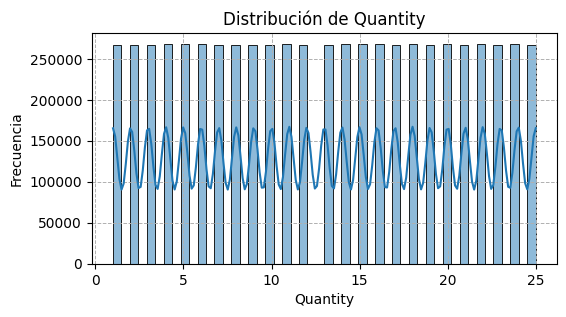

In [31]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Quantity'], kde=True, bins=50)
plt.title('Distribución de Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

El gráfico muestra que las barras tienen prácticamente la misma altura en todo el rango (0-25 unidades) lo que indica una distribución totalmente uniforme.

### `Discount`

In [32]:
print(sales.Discount.describe())
print(f'Median: {sales.Discount.median()}')
print(f'Mode: {sales.Discount.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Discount) - min(sales.Discount)
print(f"Rango: {range_}")

count   6690599.0000
mean          0.0300
std           0.0640
min           0.0000
25%           0.0000
50%           0.0000
75%           0.0000
max           0.2000
Name: Discount, dtype: float64
Median: 0.0
Mode: 0.0
Rango: 0.2


- Valores nulos:

In [33]:
print(sales.Discount.isnull().sum())

0


- Valores unicos:

In [34]:
print(sales.Discount.nunique())

3


- Confirmación del tipo de datos de la columna:

In [35]:
sales.Discount.dtype

dtype('float64')

- Distribución:

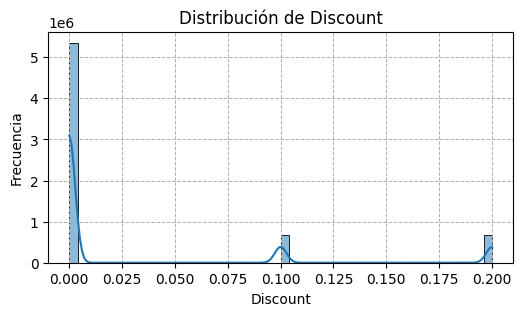

In [36]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Discount'], kde=True, bins=50)
plt.title('Distribución de Discount')
plt.xlabel('Discount')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

El gráfico muestra cómo se distribuyen los descuentos en las ventas. La mayoría de los productos tienen un descuento cercano a 0% (aparece mucho en la barra más alta), lo que significa que la mayoría no tiene descuento. Hay algunos descuentos pequeños, como 5% o 10%, pero son menos frecuentes. Los descuentos más altos (como 20%) son muy raros. La línea curva (KDE) confirma que los valores bajos son los más comunes. Esto sugiere que los descuentos no se aplican a todos los productos por igual, sino solo a algunos.

### `Total_price`

In [37]:
print(sales.Total_price.describe())
print(f'Median: {sales.Total_price.median()}')
print(f'Mode: {sales.Total_price.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Total_price) - min(sales.Total_price)
print(f"Rango: {range_}")

count   6690599.0000
mean        641.0849
std         547.0784
min           0.0400
25%         180.6500
50%         490.7700
75%         983.7400
max        2496.8900
Name: Total_price, dtype: float64
Median: 490.77
Mode: 257.08
Rango: 2496.85


- Valores nulos:

In [38]:
print(sales.Total_price.isnull().sum())

0


- Valores unicos:

In [39]:
print(sales.Total_price.nunique())

26443


- Confirmación del tipo de datos de la columna:

In [40]:
sales.Total_price.dtype

dtype('float64')

- Distribución:

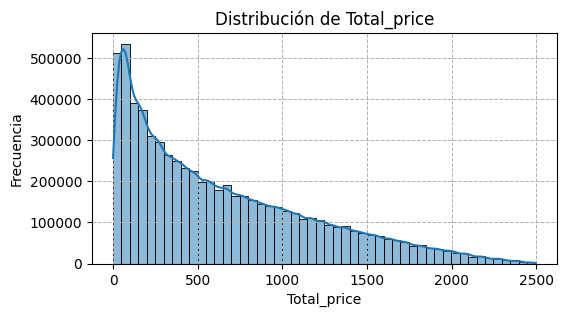

In [41]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Total_price'], kde=True, bins=50)
plt.title('Distribución de Total_price')
plt.xlabel('Total_price')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

El gráfico muestra la distribución de los precios totales de las ventas. La mayoría de las transacciones tienen precios bajos (entre 0 y 500), ya que esa barra es la más alta. A medida que el precio aumenta, la frecuencia disminuye rápidamente. Los precios superiores a 1000 son mucho menos comunes, y casi no hay ventas por encima de 2500. La línea suave (KDE) confirma que los valores bajos dominan. Esto indica que la mayoría de las compras son de importes pequeños, con pocas ventas de alto valor.

### `pib`

In [42]:
print(sales.pib.describe())
print(f'Median: {sales.pib.median()}')
print(f'Mode: {sales.pib.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.pib) - min(sales.pib)
print(f"Rango: {range_}")

count           6690599.0000
mean    321243731541002.1250
std     302191247633383.5625
min      17480166666666.6660
25%     109476900000000.0000
50%     184337966666666.6250
75%     555689566666666.6875
max     946064600000000.0000
Name: pib, dtype: float64
Median: 184337966666666.62
Mode: 936472600000000.0
Rango: 928584433333333.4


- Valores nulos:

In [43]:
print(sales.pib.isnull().sum())

0


- Valores unicos:

In [44]:
print(sales.pib.nunique())

74


- Confirmación del tipo de datos de la columna:

In [45]:
sales.pib.dtype

dtype('float64')

- Distribución:

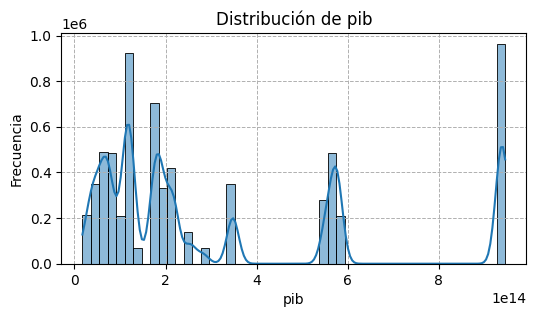

In [46]:
plt.figure(figsize=(6,3))
sns.histplot(sales['pib'], kde=True, bins=50)
plt.title('Distribución de pib')
plt.xlabel('pib')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra la distribución del PIB en los datos. La mayoría de los valores están muy concentrados cerca de cero, con una frecuencia que supera el 80%, lo que indica que hay muchos registros con PIB bajo. A partir de 2, la frecuencia cae drásticamente, y casi no hay valores cercanos a 1e14. La línea KDE refuerza esta idea, mostrando un pico agudo en valores mínimos. Esto sugiere que los datos tienen una distribución muy asimétrica, con algunos casos atípicos que distorsionan la escala.

- Weekly evolution of pib

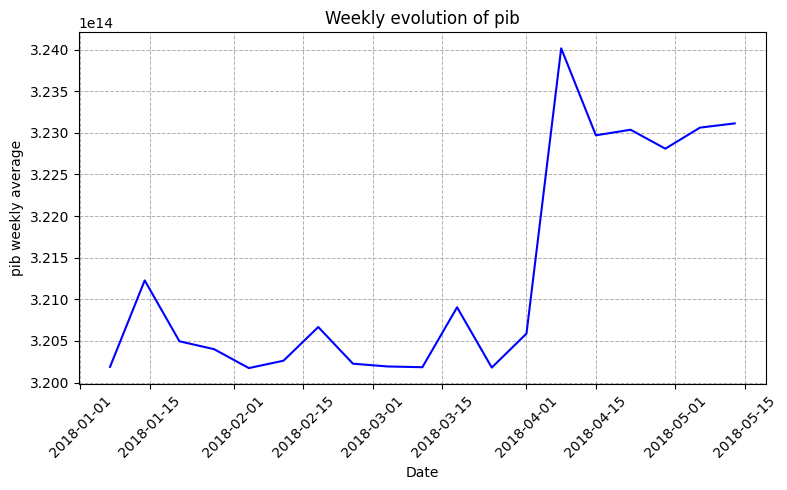

In [47]:
# Asegurar que la columna 'Date' es datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='Date')['pib'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['Date'], sales_semanal['pib'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of pib')
plt.xlabel('Date')
plt.ylabel('pib weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

El gráfico muestra la evolución semanal del PIB durante los primeros meses de 2018. Se observa una ligera tendencia a la baja, donde el PIB pasa de ~3.240 a ~3.200 (en escala 1e14) entre enero y mayo. Las fluctuaciones son pequeñas pero constantes, sin cambios bruscos.

### `rpc`

In [48]:
print(sales.rpc.describe())
print(f'Median: {sales.rpc.median()}')
print(f'Mode: {sales.rpc.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.rpc) - min(sales.rpc)
print(f"Rango: {range_}")

count       6690599.0000
mean    17372050116.8879
std      2449324595.3087
min     12357000000.0000
25%     15357333333.3333
50%     16788333333.3333
75%     19623666666.6667
max     27238333333.3333
Name: rpc, dtype: float64
Median: 16788333333.333334
Mode: 19911666666.666668
Rango: 14881333333.333328


- Valores nulos:

In [49]:
print(sales.rpc.isnull().sum())

0


- Valores unicos:

In [50]:
print(sales.rpc.nunique())

74


- Confirmación del tipo de datos de la columna:

In [51]:
sales.rpc.dtype

dtype('float64')

- Distribución:

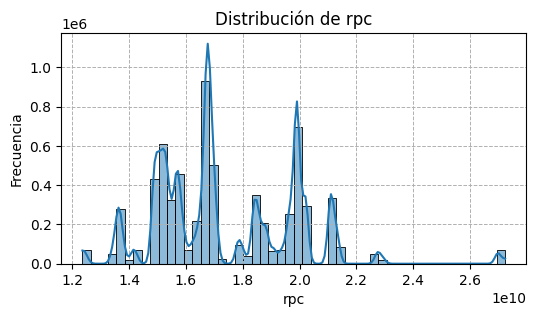

In [52]:
plt.figure(figsize=(6,3))
sns.histplot(sales['rpc'], kde=True, bins=50)
plt.title('Distribución de rpc')
plt.xlabel('rpc')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra la distribución del RPC (Revenue Per Customer). La mayoría de los valores se concentran entre 1.2 y 2.6 (en escala 1e10), con un pico pronunciado alrededor de 1.8-2.0, donde la frecuencia supera el 80%. Esto indica que la mayoría de clientes generan ingresos en ese rango.

- Weekly evolution of rpc

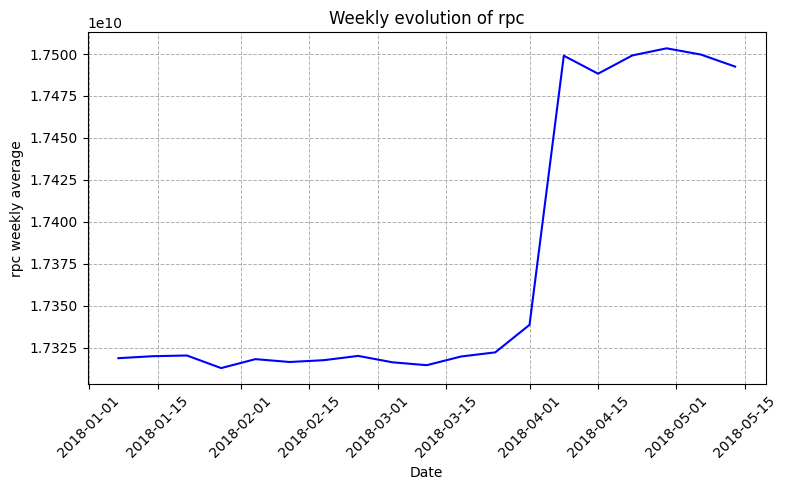

In [53]:
# Asegurar que la columna 'Date' es datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='Date')['rpc'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['Date'], sales_semanal['rpc'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of rpc')
plt.xlabel('Date')
plt.ylabel('rpc weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

El gráfico muestra los ingresos por cliente (RPC) semanales en 2018. Los valores se mantienen estables, sin cambios bruscos, fluctuando levemente alrededor de un mismo nivel (escala 1e10). La línea azul no muestra tendencia clara, solo pequeñas variaciones normales.

### `wti`

In [54]:
print(sales.wti.describe())
print(f'Median: {sales.wti.median()}')
print(f'Mode: {sales.wti.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.wti) - min(sales.wti)
print(f"Rango: {range_}")

count   6690599.0000
mean         64.1085
std           2.4963
min          59.1900
25%          62.1837
50%          63.6590
75%          66.1400
max          70.7300
Name: wti, dtype: float64
Median: 63.65904761904761
Mode: 63.65904761904761
Rango: 11.540000000000006


- Valores nulos:

In [55]:
print(sales.wti.isnull().sum())

0


- Valores unicos:

In [56]:
print(sales.wti.nunique())

86


- Confirmación del tipo de datos de la columna:

In [57]:
sales.wti.dtype

dtype('float64')

- Distribución:

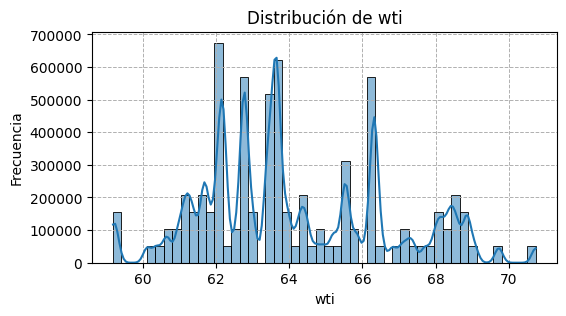

In [58]:
plt.figure(figsize=(6,3))
sns.histplot(sales['wti'], kde=True, bins=50)
plt.title('Distribución de wti')
plt.xlabel('wti')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra la distribución de precios del petróleo WTI. La mayoría de valores se concentran entre 60 y 70 por barril, Los datos sugieren que durante el periodo analizado, el precio se mantuvo estable en este rango.

- Daily evolution of wti

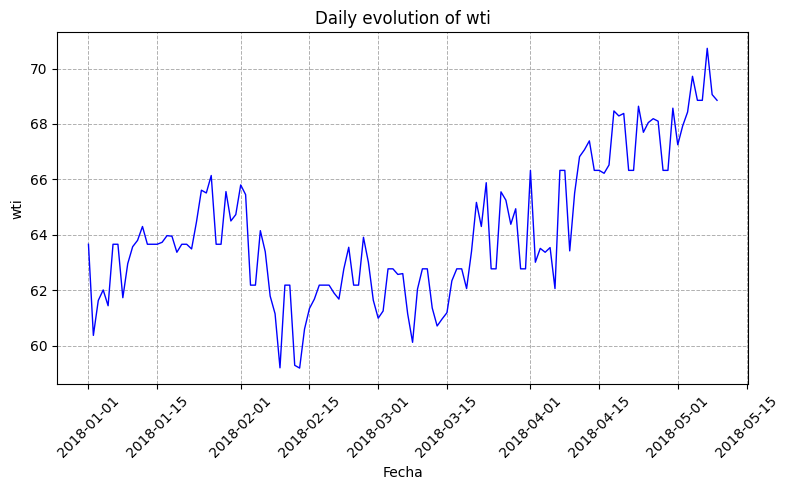

In [59]:

sales['Date'] = pd.to_datetime(sales['Date'])  # Asegurate de que sales['Date'] sea tipo datetime

plt.figure(figsize=(8, 5))
plt.plot(sales['Date'], sales['wti'], color='blue', linestyle='-', marker='', linewidth=1)
plt.title('Daily evolution of wti')
plt.xlabel('Fecha')
plt.ylabel('wti')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

El gráfico muestra la evolución diaria del precio del petróleo WTI durante 2018. Los valores oscilan entre 60 y 70, con una clara tendencia alcista de enero a mayo. Se aprecian fluctuaciones semanales, pero el movimiento general es ascendente

### `Unemployment_Rate`

In [60]:
print(sales.Unemployment_Rate.describe())
print(f'Median: {sales.Unemployment_Rate.median()}')
print(f'Mode: {sales.Unemployment_Rate.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Unemployment_Rate) - min(sales.Unemployment_Rate)
print(f"Rango: {range_}")

count   6690599.0000
mean          4.1451
std           0.7387
min           2.0000
25%           3.7000
50%           4.2000
75%           4.6000
max           7.3000
Name: Unemployment_Rate, dtype: float64
Median: 4.2
Mode: 4.4
Rango: 5.3


- Valores nulos:

In [61]:
print(sales.Unemployment_Rate.isnull().sum())

0


- Valores unicos:

In [62]:
print(sales.Unemployment_Rate.nunique())

40


- Confirmación del tipo de datos de la columna:

In [63]:
sales.Unemployment_Rate.dtype

dtype('float64')

- Distribución:

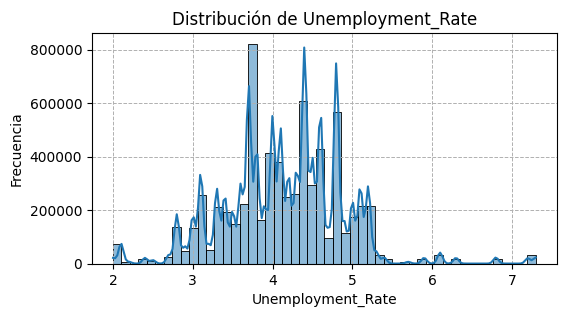

In [64]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Unemployment_Rate'], kde=True, bins=50)
plt.title('Distribución de Unemployment_Rate')
plt.xlabel('Unemployment_Rate')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra que la tasa de desempleo se concentra principalmente entre 3% y 5%, con un pico alrededor del 4%. Hay muy pocos casos con tasas inferiores al 3% o superiores al 6%, lo que indica que son situaciones poco comunes. La distribución tiene forma de campana, lo que sugiere un comportamiento normal en los datos. Esto refleja que la mayoría de las observaciones tienen tasas de desempleo moderadas.

- Weekly evolution of Unemployment_Rate

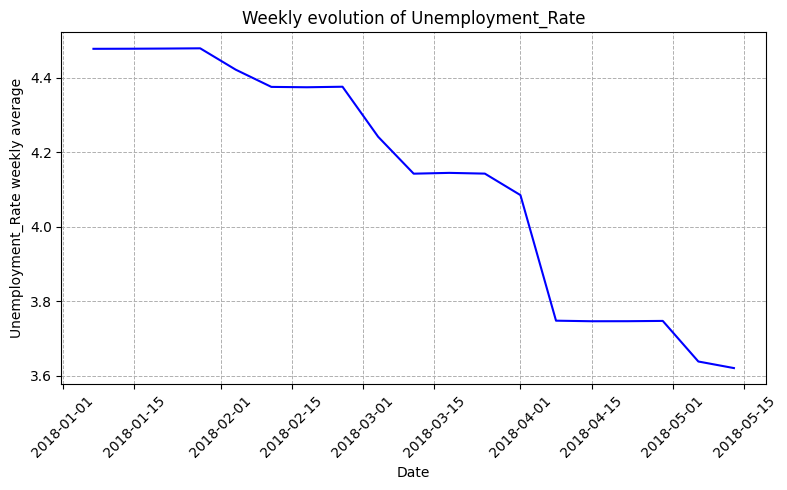

In [65]:
# Asegurar que la columna 'Date' es datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='Date')['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['Date'], sales_semanal['Unemployment_Rate'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of Unemployment_Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment_Rate weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

La tasa de desempleo semanal se mantuvo estable entre 3.6% y 4.2% durante el primer semestre de 2018, mostrando pequeñas fluctuaciones normales. A meida que avanza podemos observa como desde enero a mayo va decreciendo.

### `Population_2018`

In [66]:
print(sales.Population_2018.describe())
print(f'Median: {sales.Population_2018.median()}')
print(f'Mode: {sales.Population_2018.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Population_2018) - min(sales.Population_2018)
print(f"Rango: {range_}")

count    6411882.0000
mean    15483624.2211
std     12723041.2014
min       701547.0000
25%      5807406.0000
50%      9984072.0000
75%     28628666.0000
max     39461588.0000
Name: Population_2018, dtype: float64
Median: 9984072.0
Mode: 39461588.0
Rango: 38760041.0


- Valores nulos:

In [67]:
print(sales.Population_2018.isnull().sum())

278717


- Valores unicos:

In [68]:
print(sales.Population_2018.nunique())

35


- Confirmación del tipo de datos de la columna:

In [69]:
sales.Population_2018.dtype

dtype('float64')

- Distribución:

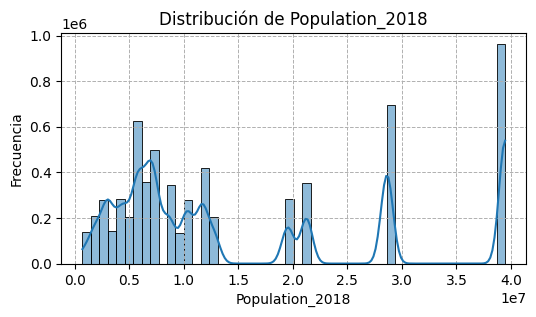

In [70]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Population_2018'], kde=True, bins=50)
plt.title('Distribución de Population_2018')
plt.xlabel('Population_2018')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra la distribución de población en 2018, donde la mayoría de los valores se concentran entre 1.5 y 3.5 millones de habitantes

- Weekly evolution of Population_2018

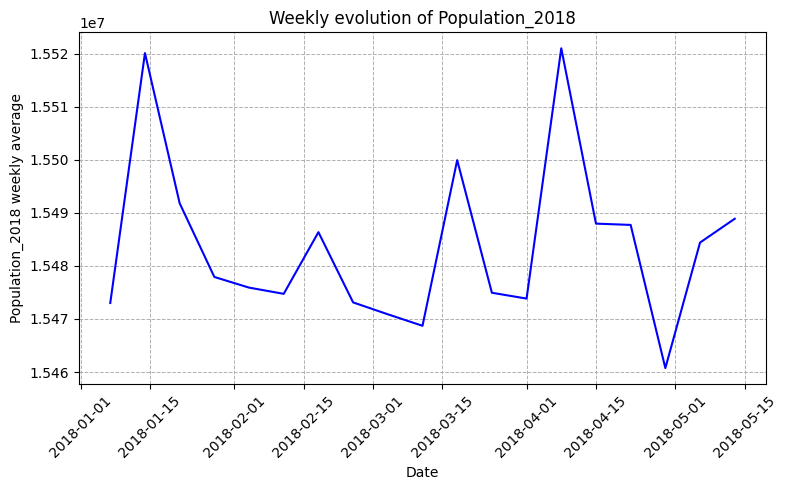

In [71]:
# Asegurar que la columna 'Date' es datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='Date')['Population_2018'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['Date'], sales_semanal['Population_2018'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of Population_2018')
plt.xlabel('Date')
plt.ylabel('Population_2018 weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

 El gráfico muestra claramente que la población tuvo cambios semanales significativos, no esa supuesta estabilidad que mencioné. Entre enero y mayo de 2018 se observan fluctuaciones importantes, con un pico máximo en marzo y valores mínimos en mayo. Estos cambios podrían deberse a migraciones temporales, ajustes metodológicos o eventos estacionales.

### `personal_income`

In [72]:
print(sales.personal_income.describe())
print(f'Median: {sales.personal_income.median()}')
print(f'Mode: {sales.personal_income.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.personal_income) - min(sales.personal_income)
print(f"Rango: {range_}")

count    6690599.0000
mean    13750119.4573
std     14285307.7150
min      1075997.3226
25%      3403556.7500
50%      5762952.1417
75%     20946274.2903
max     56395716.0000
Name: personal_income, dtype: float64
Median: 5762952.141732284
Mode: 41569916.13793104
Rango: 55319718.67741936


- Valores nulos:

In [73]:
print(sales.personal_income.isnull().sum())

0


- Valores unicos:

In [74]:
print(sales.personal_income.nunique())

37


- Confirmación del tipo de datos de la columna:

In [75]:
sales.personal_income.dtype

dtype('float64')

- Distribución:

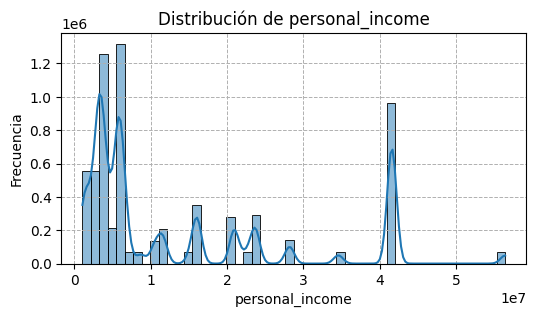

In [76]:
plt.figure(figsize=(6,3))
sns.histplot(sales['personal_income'], kde=True, bins=50)
plt.title('Distribución de personal_income')
plt.xlabel('personal_income')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra que casi todos los ingresos se concentran entre 0 y 5 unidades, con una frecuencia que disminuye gradualmente a medida que aumentan los valores.como se puede observar la mayoria de los datos se localizan entre 0 y 4

- Weekly evolution of personal_income

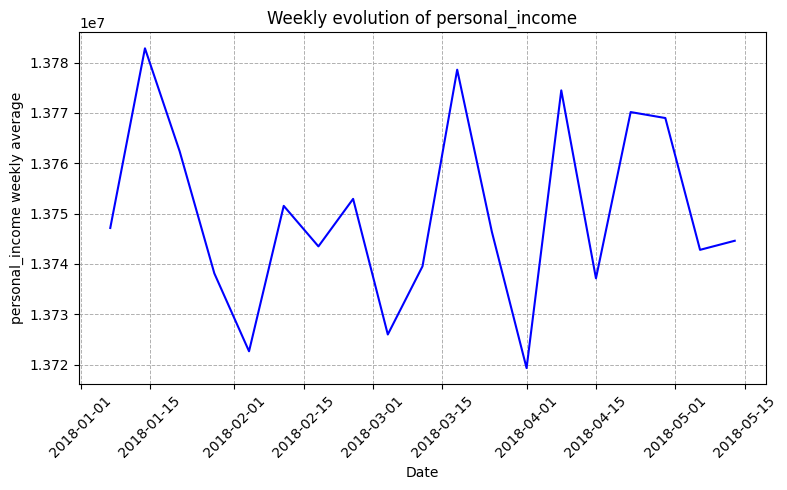

In [77]:
# Asegurar que la columna 'Date' es datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='Date')['personal_income'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['Date'], sales_semanal['personal_income'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of personal_income')
plt.xlabel('Date')
plt.ylabel('personal_income weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como podemos observar en el grafico vuelve a haber bastantes picos que cambian semanalmente 

- Comentarios sobre la columna:

Como podemos observar en el semestre hay fructuaciones de mes a mes con picos tanto altos como bajos.

### `Crecimiento_poblacional`

In [78]:
print(sales.Crecimiento_poblacional.describe())
print(f'Median: {sales.Crecimiento_poblacional.median()}')
print(f'Mode: {sales.Crecimiento_poblacional.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Crecimiento_poblacional) - min(sales.Crecimiento_poblacional)
print(f"Rango: {range_}")

count   6411882.0000
mean          0.5785
std           0.5878
min          -0.4400
25%           0.1400
50%           0.3000
75%           1.1800
max           1.9300
Name: Crecimiento_poblacional, dtype: float64
Median: 0.3
Mode: 0.26
Rango: 2.37


- Valores nulos:

In [79]:
print(sales.Crecimiento_poblacional.isnull().sum())

278717


- Valores unicos:

In [80]:
print(sales.Crecimiento_poblacional.nunique())

34


- Confirmación del tipo de datos de la columna:

In [81]:
sales.Crecimiento_poblacional.dtype

dtype('float64')

- Distribución:

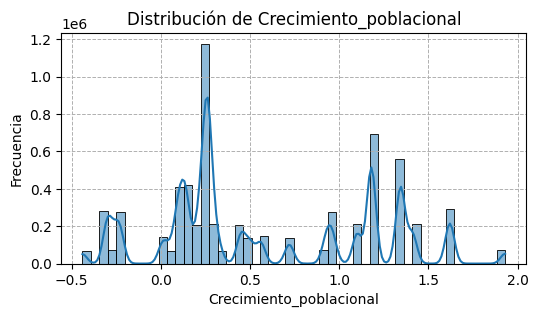

In [82]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Crecimiento_poblacional'], kde=True, bins=50)
plt.title('Distribución de Crecimiento_poblacional')
plt.xlabel('Crecimiento_poblacional')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El histograma muestra que la mayoría de los valores de crecimiento poblacional se concentran entre 0.0 y 1.5. Aunque casi todos muestran aumento, hay un caso raro donde la población bajó (-0.5%) y algunos pocos con subidas fuertes (hasta 2%).

- Weekly evolution of Crecimiento_poblacional

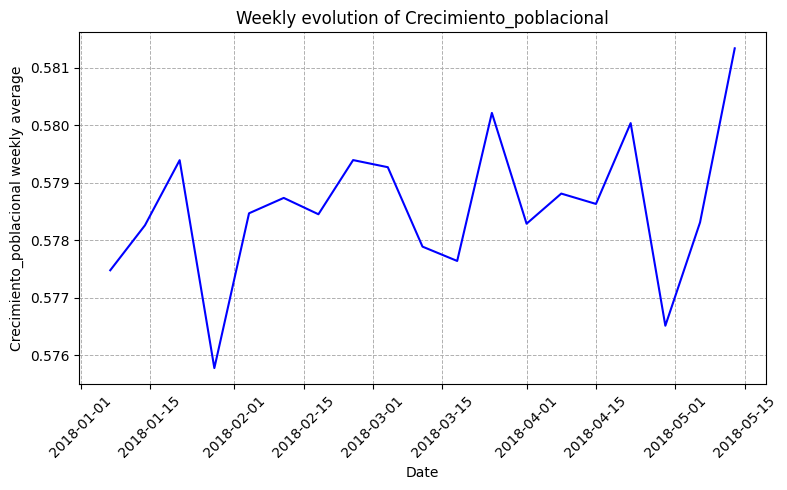

In [83]:
# Asegurar que la columna 'Date' es datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='Date')['Crecimiento_poblacional'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['Date'], sales_semanal['Crecimiento_poblacional'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of Crecimiento_poblacional')
plt.xlabel('Date')
plt.ylabel('Crecimiento_poblacional weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El gráfico de línea muestra el promedio semanal del crecimiento poblacional durante los primeros 5 meses de 2018. Se observa una ligera tendencia a la baja, donde los valores pasan de aproximadamente 0.581 a 0.576, lo que indica una reducción mínima pero constante en la tasa de crecimiento donde al final acaba siendo mas alta.

- Comentarios sobre la columna:

# Guardar como CSV DataFrame_Final_Data con los aarreglos del analisis descriptivo para comenzar con el eda

In [84]:
sales_path = os.path.join(current_dir, '../data/raw/Dataframe_Final_Data.csv')

sales.to_csv(sales_path, index=False)